In [1]:
words = open("names.txt","r").read().splitlines()
len(words)

32033

In [3]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}

In [4]:
import torch

In [5]:
block_size = 3

def build_datasets(words):
    X,Y =[],[]
    for w in words:
        context = [0] * block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

In [7]:
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_datasets(words[:n1])
Xdev, Ydev = build_datasets(words[n1:n2])
Xte, Yte = build_datasets(words[n2:])

In [8]:
Xtr.shape, Ytr.shape, Xdev.shape, Ydev.shape, Xte.shape, Yte.shape

(torch.Size([182580, 3]),
 torch.Size([182580]),
 torch.Size([22767, 3]),
 torch.Size([22767]),
 torch.Size([22799, 3]),
 torch.Size([22799]))

In [9]:
vocab_size = len(itos)

In [10]:
n_embd = 10
n_hidden = 200

g = torch.Generator().manual_seed(21474783647)
C = torch.rand((vocab_size,n_embd),generator=g)
W1 = torch.rand((n_embd*block_size,n_hidden),generator=g)
b1 = torch.rand(n_hidden,generator=g)
W2 = torch.rand((n_hidden, vocab_size),generator=g)
b2= torch.rand(vocab_size,generator=g)
parameters = [C,W1,b1,W2,b2]
for p in parameters:
    p.requires_grad=True

In [15]:
import torch.nn.functional as F

In [17]:
max_steps = 200000
batch_size = 32
lossi = []
for i in range(max_steps):
    ix = torch.randint(0,Xtr.shape[0],(batch_size,), generator=g)
    Xb, Yb = Xtr[ix],Ytr[ix]
    emb = C[Xb]
    h = torch.tanh(emb.view(emb.shape[0],-1)@W1+b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Yb)

    for p in parameters:
        p.grad =None
    
    loss.backward()

    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    if i % 10000==0:
        print(f"{i:7d}/{max_steps:7d}: {loss.item():.4f}")
    lossi.append(loss.log10().item())

      0/ 200000: 7.0780
  10000/ 200000: 3.6541
  20000/ 200000: 3.4163
  30000/ 200000: 4.0502
  40000/ 200000: 5.9780
  50000/ 200000: 3.3415
  60000/ 200000: 4.1508
  70000/ 200000: 4.0546
  80000/ 200000: 4.4201
  90000/ 200000: 3.9815
 100000/ 200000: 3.7979
 110000/ 200000: 2.7817
 120000/ 200000: 2.8398
 130000/ 200000: 2.8124
 140000/ 200000: 2.9336
 150000/ 200000: 2.7255
 160000/ 200000: 2.6588
 170000/ 200000: 2.8906
 180000/ 200000: 2.9131
 190000/ 200000: 2.9572


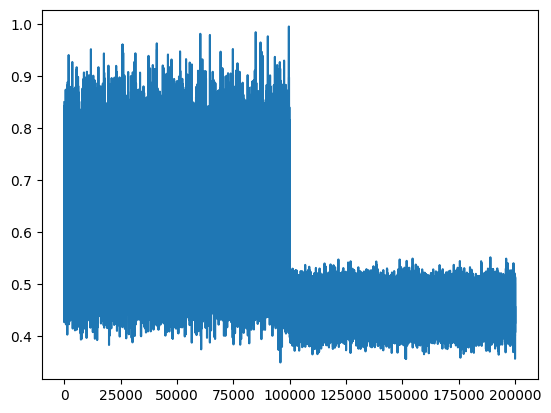

In [23]:
import matplotlib.pyplot as plt
plt.plot(lossi)

In [24]:
torch.no_grad()
def split_loss(split):
    x,y = {
        'train':(Xtr,Ytr),
        'val':(Xdev,Ydev),
        'test':(Xte,Yte)
    }[split]
    emb = C[x]
    h = torch.tanh(emb.view(emb.shape[0],-1)@W1+b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,y)
    print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.833017587661743
val 2.8283889293670654


In [28]:
g = torch.Generator().manual_seed(21474783647+10)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1)@W1+b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs,num_samples=1,generator=g).item()
        context = context[1:]+[ix]
        out.append(ix)
        if ix ==0:
            break
    print(''.join(itos[i] for i in out))

uyaaas.
kdaeoazymk.
klceahn.
lj.
.
nnaueiaaaenrenlaayl.
.
yh.
ntszvm.
aaneeicla.
aalrnaaiceeyampsraoativioarsy.
e.
acaaeym.
iay.
hinai.
ailnaecaiejlrlafeuh.
eaykrdaiauniaiaednl.
.
dgrp.
nemareurts.
